# Importeer data


In [110]:
import kagglehub
import pandas as pd
import sklearn
import numpy as np 
path = kagglehub.dataset_download("arshid/iris-flower-dataset")
db = pd.read_csv(path + "/Iris.csv")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\jagro\.cache\kagglehub\datasets\arshid\iris-flower-dataset\versions\1


In [111]:

db

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Decision Tree

In [112]:
from sklearn.model_selection import train_test_split

# One-hot encode the 'species' column
db_encoded = pd.get_dummies(db, columns=['species'])

# Prepare features and labels
X_df = db_encoded.drop(columns=['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica'])
y_df = db_encoded[['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica']]

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

list(X_df.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# MAX DEPTH

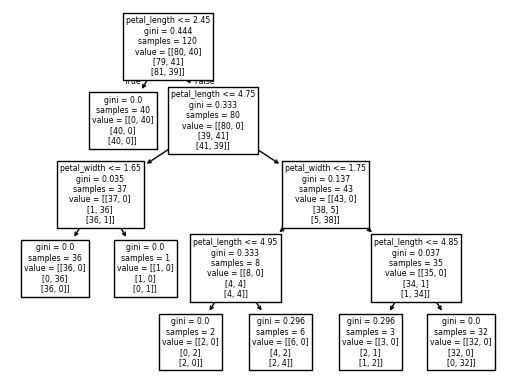

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier(max_depth=4)
dtree = dtree.fit(X_train, y_train)
tree.plot_tree(dtree, feature_names=X_df.columns)
plt.show()

In [114]:
# Create a DataFrame for predicted labels with appropriate column names
predicted_df = pd.DataFrame(dtree.predict(X_test), columns=y_test.columns)
predicted_df = predicted_df.add_prefix('Predicted_')

# Concatenate true and predicted labels for comparison
model_results_frame = pd.concat([y_test.reset_index(drop=True), predicted_df.reset_index(drop=True)], axis=1)
model_results_frame

,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica,Predicted_species_Iris-setosa,Predicted_species_Iris-versicolor,Predicted_species_Iris-virginica
0,False,True,False,False,True,False
1,True,False,False,True,False,False
2,False,False,True,False,False,True
3,False,True,False,False,True,False
4,False,True,False,False,True,False
5,True,False,False,True,False,False
6,False,True,False,False,True,False
7,False,False,True,False,False,True
8,False,True,False,False,True,False
9,False,True,False,False,True,False


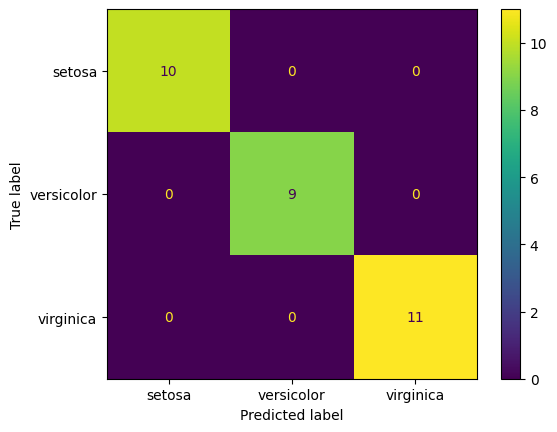

In [115]:
# Convert one-hot encoded columns to single label values
true_labels = np.argmax(model_results_frame.iloc[:, :3].values, axis=1)
pred_labels = np.argmax(model_results_frame.iloc[:, 3:].values, axis=1)

confusion_matrix = metrics.confusion_matrix(true_labels, pred_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['setosa', 'versicolor', 'virginica'])

cm_display.plot()
plt.show()

In [116]:
best_accuracy = 0
best_depth = 0

max_depths = range(1, 40)
for depth in max_depths:
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree = dtree.fit(X_train, y_train)
    
    y_pred = dtree.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    print(f"Max depth: {depth}, Accuracy: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"\n🎯 Highest Accuracy: {best_accuracy:.4f} at Max Depth: {best_depth}")

Max depth: 1, Accuracy: 0.6333
Max depth: 2, Accuracy: 0.9667
Max depth: 3, Accuracy: 0.9667
Max depth: 4, Accuracy: 1.0000
Max depth: 5, Accuracy: 1.0000
Max depth: 6, Accuracy: 1.0000
Max depth: 7, Accuracy: 1.0000
Max depth: 8, Accuracy: 1.0000
Max depth: 9, Accuracy: 1.0000
Max depth: 10, Accuracy: 1.0000
Max depth: 11, Accuracy: 1.0000
Max depth: 12, Accuracy: 1.0000
Max depth: 13, Accuracy: 1.0000
Max depth: 14, Accuracy: 1.0000
Max depth: 15, Accuracy: 1.0000
Max depth: 16, Accuracy: 1.0000
Max depth: 17, Accuracy: 1.0000
Max depth: 18, Accuracy: 1.0000
Max depth: 19, Accuracy: 1.0000
Max depth: 20, Accuracy: 1.0000
Max depth: 21, Accuracy: 1.0000
Max depth: 22, Accuracy: 1.0000
Max depth: 23, Accuracy: 1.0000
Max depth: 24, Accuracy: 1.0000
Max depth: 25, Accuracy: 1.0000
Max depth: 26, Accuracy: 1.0000
Max depth: 27, Accuracy: 1.0000
Max depth: 28, Accuracy: 1.0000
Max depth: 29, Accuracy: 1.0000
Max depth: 30, Accuracy: 1.0000
Max depth: 31, Accuracy: 1.0000
Max depth: 32, Ac

In [117]:
metrics.accuracy_score(true_labels, pred_labels)

1.0

# Logic Regression

In [118]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [119]:
db
X = db.drop(columns=['species'])
y = db['species']
y = pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.30,
    random_state = 40
)

In [121]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, y_train)
reg_model

LinearRegression()

In [122]:
y_pred= reg_model.predict(X_test)
y_pred

array([[ 0.83454152,  0.31299803, -0.14753956],
       [ 0.11112987,  0.37493895,  0.51393118],
       [-0.02220467,  0.10193497,  0.9202697 ],
       [-0.1078416 ,  0.20109127,  0.90675033],
       [ 0.12473175,  0.55063935,  0.32462891],
       [-0.06219326,  0.04332561,  1.01886764],
       [-0.01302667,  0.67242896,  0.34059771],
       [ 0.12926008,  0.51592371,  0.35481621],
       [ 0.09608974,  0.37552575,  0.52838451],
       [ 0.95668503,  0.18122083, -0.13790585],
       [ 0.06209073,  0.63868949,  0.29921978],
       [ 0.8812938 ,  0.22278479, -0.10407859],
       [ 0.9786387 ,  0.07953043, -0.05816913],
       [ 0.02550067,  0.37454959,  0.59994974],
       [ 0.29467283,  0.54569745,  0.15962973],
       [-0.0827494 ,  0.0550778 ,  1.0276716 ],
       [-0.01079437,  0.43185768,  0.57893669],
       [-0.05546419,  0.23378063,  0.82168356],
       [ 0.09790627,  0.55149203,  0.3506017 ],
       [ 0.16032497,  0.41183605,  0.42783898],
       [-0.16798829,  0.35682144,  0.811

In [123]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns = {0 : 'Predicted_setosa', 1 : 'Predicted_versicolor', 2 : 'Predicted_virginica'}) 
prediction_df

,Predicted_setosa,Predicted_versicolor,Predicted_virginica
0,0.834542,0.312998,-0.147540
1,0.111130,0.374939,0.513931
2,-0.022205,0.101935,0.920270
3,-0.107842,0.201091,0.906750
4,0.124732,0.550639,0.324629
5,-0.062193,0.043326,1.018868
6,-0.013027,0.672429,0.340598
7,0.129260,0.515924,0.354816
8,0.096090,0.375526,0.528385
9,0.956685,0.181221,-0.137906


In [124]:
# Concatenate y_test and prediction_df for comparison
y_test_prediction_merge = pd.concat([y_test.reset_index(drop=True), prediction_df], axis=1)
y_test_prediction_merge

,Iris-setosa,Iris-versicolor,Iris-virginica,Predicted_setosa,Predicted_versicolor,Predicted_virginica
0,True,False,False,0.834542,0.312998,-0.147540
1,False,True,False,0.111130,0.374939,0.513931
2,False,False,True,-0.022205,0.101935,0.920270
3,False,False,True,-0.107842,0.201091,0.906750
4,False,True,False,0.124732,0.550639,0.324629
5,False,False,True,-0.062193,0.043326,1.018868
6,False,True,False,-0.013027,0.672429,0.340598
7,False,True,False,0.129260,0.515924,0.354816
8,False,True,False,0.096090,0.375526,0.528385
9,True,False,False,0.956685,0.181221,-0.137906


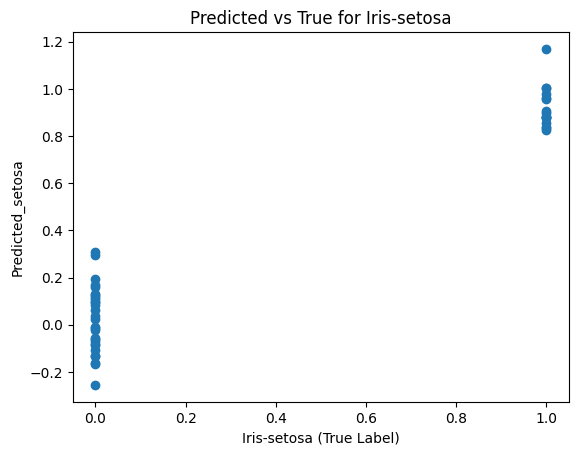

In [125]:
plt.scatter(y_test_prediction_merge['Iris-setosa'], y_test_prediction_merge['Predicted_setosa'])
plt.xlabel('Iris-setosa (True Label)')
plt.ylabel('Predicted_setosa')
plt.title('Predicted vs True for Iris-setosa')
plt.show()

In [126]:
#if the prediction value if greater than 0.5 then it is true else false
y_test_prediction_merge['Predicted_setosa'] = y_test_prediction_merge['Predicted_setosa'].apply(lambda x: 'True' if x > 0.5 else 'False')
y_test_prediction_merge['Predicted_versicolor'] = y_test_prediction_merge['Predicted_versicolor'].apply(lambda x: 'True' if x > 0.5 else 'False')
y_test_prediction_merge['Predicted_virginica'] = y_test_prediction_merge['Predicted_virginica'].apply(lambda x: 'True' if x > 0.5 else 'False')
y_test_prediction_merge



,Iris-setosa,Iris-versicolor,Iris-virginica,Predicted_setosa,Predicted_versicolor,Predicted_virginica
0,True,False,False,True,False,False
1,False,True,False,False,False,True
2,False,False,True,False,False,True
3,False,False,True,False,False,True
4,False,True,False,False,True,False
5,False,False,True,False,False,True
6,False,True,False,False,True,False
7,False,True,False,False,True,False
8,False,True,False,False,False,True
9,True,False,False,True,False,False


In [127]:
#display the accuracy of the model
from sklearn.metrics import accuracy_score

# Convert predicted columns to boolean
pred_setosa_bool = y_test_prediction_merge['Predicted_setosa'] == 'True'
pred_versicolor_bool = y_test_prediction_merge['Predicted_versicolor'] == 'True'
pred_virginica_bool = y_test_prediction_merge['Predicted_virginica'] == 'True'

accuracy_setosa = accuracy_score(y_test_prediction_merge['Iris-setosa'], pred_setosa_bool)
accuracy_versicolor = accuracy_score(y_test_prediction_merge['Iris-versicolor'], pred_versicolor_bool)
accuracy_virginica = accuracy_score(y_test_prediction_merge['Iris-virginica'], pred_virginica_bool)
accuracy_setosa, accuracy_versicolor, accuracy_virginica

(1.0, 0.8666666666666667, 0.9555555555555556)